<h1><center><u> Linear Regression Analysis </u></center></h1>

We are going to model the relationship between two financial assets, **the price of a single share of Exxon Mobile stock and the price of a barrel of oil**. The question we are trying to answer is, does the explanatory variable (Oil) do a good job at predicting the dependent variable (a single share of Exxon Mobile stock).

<h3 style="color:blue;"> (1) Import Python Libraries </h3>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

<h3 style="color:blue;"> (2) Loading the Data Set </h3>

In [3]:
path = r"D:\IITG\portfolio_finance\linear_regression\oil_exxon.xlsx"

In [4]:
price_data = pd.read_excel(path)
price_data.head()

,date,exon_price,oil_price
0,2014-03-28,97.699997,106.64
1,2014-03-31,97.680000,105.95
2,2014-04-01,97.730003,105.70
3,2014-04-02,97.949997,103.37
4,2014-04-03,97.930000,104.88


In [5]:
price_data.index = pd.to_datetime(price_data['date'])
price_data.head()

,date,exon_price,oil_price
date,,,
2014-03-28,2014-03-28,97.699997,106.64
2014-03-31,2014-03-31,97.680000,105.95
2014-04-01,2014-04-01,97.730003,105.70
2014-04-02,2014-04-02,97.949997,103.37
2014-04-03,2014-04-03,97.930000,104.88


In [6]:
price_data = price_data.drop(['date'], axis=1)
price_data.head()

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


<h3 style="color:blue;"> (3) Cleaning the Data Set </h3>

In [7]:
price_data.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [8]:
new_column_names = {'exon_price':'exxon_price'}

In [9]:
price_data = price_data.rename(columns=new_column_names)
price_data.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [10]:
price_data.isna().any()

exxon_price    False
oil_price       True
dtype: bool

In [11]:
price_data = price_data.dropna()
price_data.isna().any()

exxon_price    False
oil_price      False
dtype: bool

<h3 style="color:blue;"> (4) Finding Correlations in the Data Set </h3>

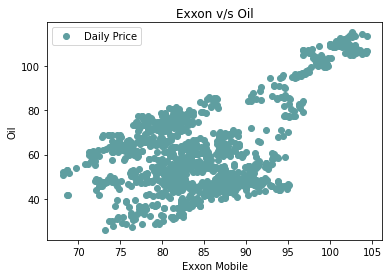

In [12]:
x = price_data['exxon_price']
y = price_data['oil_price']

plt.plot(x, y, 'o', color='cadetblue', label='Daily Price')

plt.title('Exxon v/s Oil')
plt.xlabel('Exxon Mobile')
plt.ylabel('Oil')
plt.legend()

plt.show()

***
Generally speaking, this is how we measure the strength of correlations.
 
 - Very strong relationship **(|r|>0.8 =>)**
 - Strong relationship **(0.6≤|r|)**
 - Moderate relationship **(0.4≤|r|)**
 - Weak relationship **(0.2≤|r|)**
 - Very weak relationship **(|r|)** 

In [13]:
price_data.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


In [14]:
price_data.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


array([[<AxesSubplot:title={'center':'exxon_price'}>,
        <AxesSubplot:title={'center':'oil_price'}>]], dtype=object)

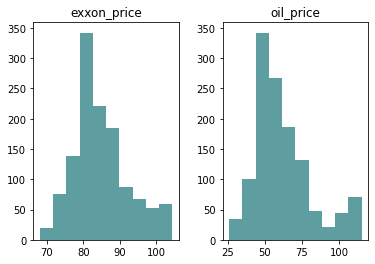

In [15]:
price_data.hist(grid=False, color='cadetblue')

<h3 style="color:blue;"> (5) Dealing with Outliers and Skewness in the Data Set </h3>

Okay, so some of the data does appear to be skewed but not too much. However, we probably should verify this by taking some measurements. Two good metrics we can use are the kurtosis and skew, where kurtosis measure the height of our distribution and skew measures whether it is positively or negatively skewed. We will use the `scipy.stats` module to do the measurements.


In [16]:
exxon_kurtosis = kurtosis(price_data['exxon_price'], fisher=True)
oil_kurtosis = kurtosis(price_data['oil_price'], fisher=True)

In [17]:
display('Exxon Excess Kurtosis: {:.2}'.format(exxon_kurtosis))
display('Oil Excess Kurtosis: {:.2}'.format(oil_kurtosis))

'Exxon Excess Kurtosis: 0.088'

'Oil Excess Kurtosis: 0.53'

In [18]:
exxon_skew = skew(price_data['exxon_price'])
oil_skew = skew(price_data['oil_price'])

In [19]:
display('Exxon Skew: {:.2}'.format(exxon_skew))
display('Oil Skew: {:.2}'.format(oil_skew))

'Exxon Skew: 0.66'

'Oil Skew: 1.0'

***
We can also perform a `kurtosistest()` and `skewtest()` on our data to test whether the data is normally distributed. With these two functions we test the null hypothesis that the kurtosis of the population from which the sample was drawn is that of the normal distribution: kurtosis = 3(n-1)/(n+1) & the null hypothesis that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution, respectively.

However, there is a **big caveat** to this.  As our dataset grows larger, the chances of us rejecting the null hypothesis increases even if there is only slight kurtosis or skew. In other words, even if our dataset is slightly non-normal, we will reject the null hypothesis. These results are unrealistic because the chances of us having a perfectly normal dataset are very very slim, so we have to take these results with a grain of salt.

In [20]:
display('Exxon')
display(stats.kurtosistest(price_data['exxon_price']))
display('Oil')
display(stats.kurtosistest(price_data['oil_price']))

'Exxon'

KurtosistestResult(statistic=0.7185349375030217, pvalue=0.47242751383320714)

'Oil'

KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)

In [21]:
display('Exxon')
display(stats.skewtest(price_data['exxon_price']))
display('Oil')
display(stats.skewtest(price_data['oil_price']))

'Exxon'

SkewtestResult(statistic=8.770169400598549, pvalue=1.7839768456341654e-18)

'Oil'

SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159923e-35)

***
If we look at the results above, we will reject the null hypothesis 3 out of 4 times, even with the data being slightly skewed or having mild kurtosis. This is why we always need to visualize the data and calculate the metrics before running these test.

***

**Kurtosis**
- Any distribution with **kurtosis ≈3 (excess ≈0)** is called mesokurtic. This is a normal distribution
- Any distribution with **kurtosis <3 (excess kurtosis <0)** is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broader.
- Any distribution with **kurtosis >3 (excess kurtosis >0)** is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and sharper.

***

**Skewness**
- If skewness is **less than −1 or greater than +1**, the distribution is highly skewed.
- If skewness is **between −1 and −½ or between +½ and +1**, the distribution is moderately skewed.
- If skewness is **between −½ and +½**, the distribution is approximately symmetric.

<h3 style="color:blue;"> (6) Building the Model </h3>

### Split the Data

In [22]:
Y = price_data.drop('oil_price', axis=1)
X = price_data[['oil_price']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

### Create and Fit the Model

In [24]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

### Explore the Output

In [25]:
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))

The Coefficient for our model is 0.23
The intercept for our model is 70.55


### Taking a single prediction

In [26]:
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))

The predicted value is 86.0


### Making multiple predictions at once

In [27]:
y_predict = regression_model.predict(X_test)
y_predict[:5]

array([[82.39718427],
       [83.0168246 ],
       [81.66738567],
       [79.18882438],
       [84.12070236]])

<h3 style="color:blue;"> (7) Evaluating the Model </h3>

In [28]:
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()

### Confidence Intervals

By default, confidence intervals are calculated using 95% intervals. We interpret confidence intervals by saying if the population from which this sample was drawn was sampled 100 times, approximately 95 of those confidence intervals would contain the "true" coefficient.

In [29]:
est.conf_int()

,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


Interpreting the output above, we would say that with 95% confidence the oil_price coefficient exists between 0.214 & 0.248.
***
### Hypothesis Testing

With hypothesis testing, we are trying to determine the statistical significance of the coefficient estimates. This test is outlined as the following.

- **Null Hypothesis:** There is no relationship between the exploratory variables and the explanatory variable.
- **Alternative Hypothesis:** There is a relationship between the exploratory variables and the explanatory variable.

In [30]:
est.pvalues

const         0.000000e+00
oil_price    1.423529e-123
dtype: float64

The p-value represents the probability that the coefficient equals 0. We want a p-value that is less than 0.05 if it is we can reject the null hypothesis. In this case, the p-value for the oil_price coefficient is much lower than 0.05, so we can reject the null hypothesis and say that there is a relationship and that we believe it to be between oil and the price of Exxon.
***

<h3 style="color:blue;"> (8) Examining Model Fit </h3>

- **Mean Absolute Error (MAE):** Is the mean of the absolute value of the errors. This metric gives an idea of magnitude but no idea of direction (too high or too low).

- **Mean Squared Error (MSE):** Is the mean of the squared errors.MSE is more popular than MAE because MSE "punishes" more significant errors.

- **Root Mean Squared Error (RMSE):** Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

In [31]:
model_mse = mean_squared_error(y_test, y_predict)
model_mae = mean_absolute_error(y_test, y_predict)
model_rmse =  math.sqrt(model_mse)

print("MSE: {:.3}".format(model_mse))
print("MAE: {:.3}".format(model_mae))
print("RMSE: {:.3}".format(model_rmse))

MSE: 38.8
MAE: 5.05
RMSE: 6.23


***
### R-Squared

The R-Squared metric provides us a way to measure the goodness of fit or how well our data fits the model. The higher the R-Squared metric, the better the data fit our model. However, one limitation is that R-Square increases as the number of feature increases in our model, so it does not pay to select the model with the highest R-Square.

In [32]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.36


With R-Square, we have to be careful when interpreting the output because it depends on what our the goal is. The R-squared is generally of secondary importance unless the main concern is using the regression equation to make accurate predictions. It boils down to the domain-specific problem, and many people would argue an R-Square of .36 is great for stocks because it is hard to control for all the external factors, while others may not agree.
***

In [33]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            exxon_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Mon, 21 Aug 2023   Prob (F-statistic):          1.42e-123
Time:                        16:03:41   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

***
### Plotting the Residuals

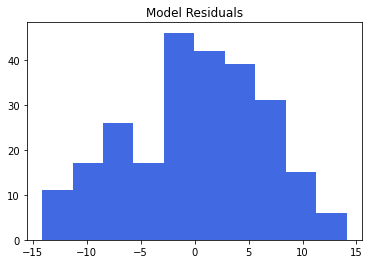

In [34]:
(y_test - y_predict).hist(grid=False, color='royalblue')
plt.title('Model Residuals')
plt.show()

<h3 style="color:blue;"> (9) Plotting the Linear Regression Line </h3>

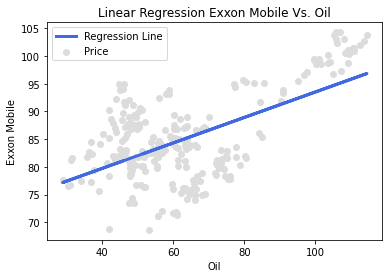

Oil coefficient: 0.23
Mean squared error: 38.75
Root Mean squared error: 6.225
R2 score: 0.36


In [35]:
plt.scatter(X_test, y_test, color='gainsboro', label='Price')
plt.plot(X_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Linear Regression Exxon Mobile Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobile")
plt.legend()
plt.show()

# The coefficients
print('Oil coefficient: ' + '\033[1m' + '{:.2}''\033[0m'.format(regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

<h3 style="color:blue;"> (10) Saving the Model for Future </h3>

In [36]:
import pickle

# pickle the model.
with open('my_linear_regression.sav','wb') as f:
     pickle.dump(regression_model,f)

# load it back in.
with open('my_linear_regression.sav', 'rb') as pickle_file:
     regression_model_2 = pickle.load(pickle_file)

# make a new prediction.
regression_model_2.predict([[67.33]])

array([[85.99798304]])